# Pymaceuticals Inc.
---

### Analysis

- From the data we can see that the drug Ketapril
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_combined=pd.merge(mouse_metadata,study_results,on='Mouse ID',how='outer') 

# Display the data table for preview
data_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [5]:
# Checking the number of mice.
data_combined['Mouse ID'].nunique()

249

In [17]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_duplicate = data_combined.loc[data_combined.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique() 
mouse_duplicate


array(['g989'], dtype=object)

In [30]:
# Optional: Get all the data for the duplicate mouse ID.
# Retrieve all rows for duplicate Mouse ID
duplicate_mouse_id = data_combined[data_combined.duplicated(subset='Mouse ID', keep=False)]
duplicate_mouse_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_combined_filtered = data_combined[data_combined['Mouse ID'] != 'g989']
data_combined_filtered.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [32]:
# Checking the number of mice in the clean DataFrame.
data_combined_filtered['Mouse ID'].nunique()

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = data_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = data_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = data_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor_volume = data_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = data_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

data_combined_summary = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std Dev': std_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
})

data_combined_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
data_combined_summary2 = data_combined_filtered.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    variance_tumor_volume=('Tumor Volume (mm3)', 'var'),
    std_tumor_volume=('Tumor Volume (mm3)', 'std'),
    sem_tumor_volume=('Tumor Volume (mm3)', 'sem')
).reset_index()

data_combined_summary2


,Drug Regimen,mean_tumor_volume,median_tumor_volume,variance_tumor_volume,std_tumor_volume,sem_tumor_volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

<Axes: title={'center': 'Total Number of Rows (Mouse ID/Timepoints)'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

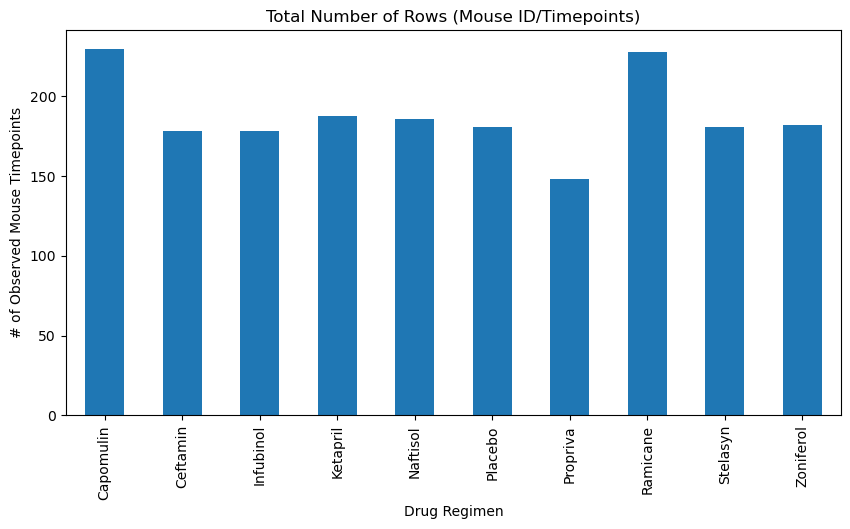

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data_combined_filtered.groupby('Drug Regimen').size().plot(kind='bar', title='Total Number of Rows (Mouse ID/Timepoints)', ylabel='# of Observed Mouse Timepoints', xlabel='Drug Regimen', legend=False, figsize=(10,5))


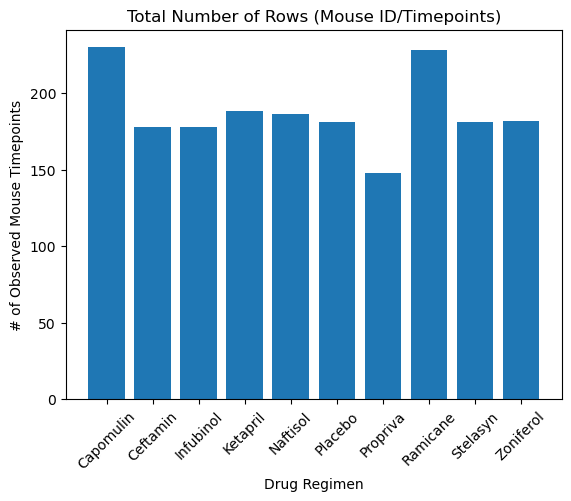

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = data_combined_filtered.groupby('Drug Regimen').size()
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title('Total Number of Rows (Mouse ID/Timepoints)')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

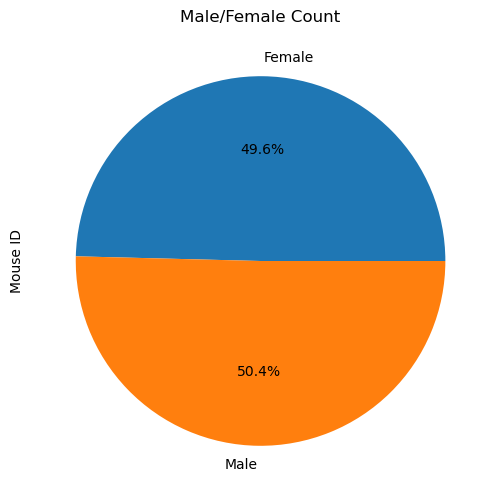

In [47]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
data_combined_filtered.groupby('Sex').nunique()['Mouse ID'].plot(kind='pie', autopct='%1.1f%%', title='Male/Female Count', figsize=(6, 6))
# Get the unique mice with their gender
# Make the pie chart
plt.show()


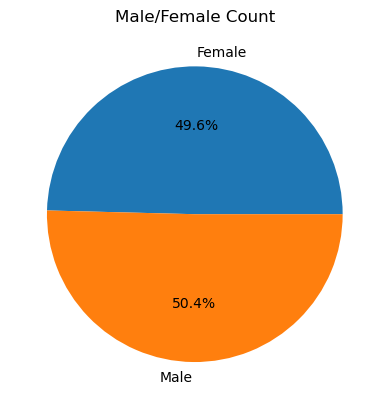

In [45]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
gender_distribution = data_combined_filtered.groupby('Sex').nunique()['Mouse ID']
plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Male/Female Count')

# Get the unique mice with their gender
# Make the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = data_combined[data_combined['Drug Regimen'].isin(treatment_regimens)].copy()
# Start by getting the last (greatest) timepoint for each mouse
filtered_data = filtered_data.sort_values(['Mouse ID', 'Timepoint'], ascending=[True, False])
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_data = filtered_data.drop_duplicates(subset='Mouse ID', keep='first')
final_timepoint_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,a203,Infubinol,Female,20,23,45,67.973419,2
19,a251,Infubinol,Female,21,25,45,65.525743,1
39,a275,Ceftamin,Female,20,28,45,62.999356,3
66,a411,Ramicane,Male,3,22,45,38.407618,1
76,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1825,y769,Ceftamin,Female,6,27,45,68.594745,4
1835,y793,Capomulin,Male,17,17,45,31.896238,2
1845,y865,Ceftamin,Male,23,26,45,64.729837,3
1862,z578,Ramicane,Male,11,16,45,30.638696,0


In [56]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capomulin_potential_outliers = []
ramicane_potential_outliers = []
infubinol_potential_outliers = []
ceftamin_potential_outliers = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = final_timepoint_data.loc[final_timepoint_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    # add subset
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    print(f"{treatment} regimen:")
    print(f"Lower quartile: {lowerq}, Upper quartile: {upperq}, IQR: {iqr}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
   



Capomulin regimen:
Lower quartile: 32.37735684, Upper quartile: 40.1592203, IQR: 7.781863460000004
Lower bound: 20.70456164999999, Upper bound: 51.83201549
Ramicane regimen:
Lower quartile: 31.56046955, Upper quartile: 40.65900627, IQR: 9.098536719999998
Lower bound: 17.912664470000003, Upper bound: 54.30681135
Infubinol regimen:
Lower quartile: 54.04860769, Upper quartile: 65.52574285, IQR: 11.477135160000003
Lower bound: 36.83290494999999, Upper bound: 82.74144559000001
Ceftamin regimen:
Lower quartile: 48.72207785, Upper quartile: 64.29983003, IQR: 15.577752179999997
Lower bound: 25.355449580000002, Upper bound: 87.66645829999999


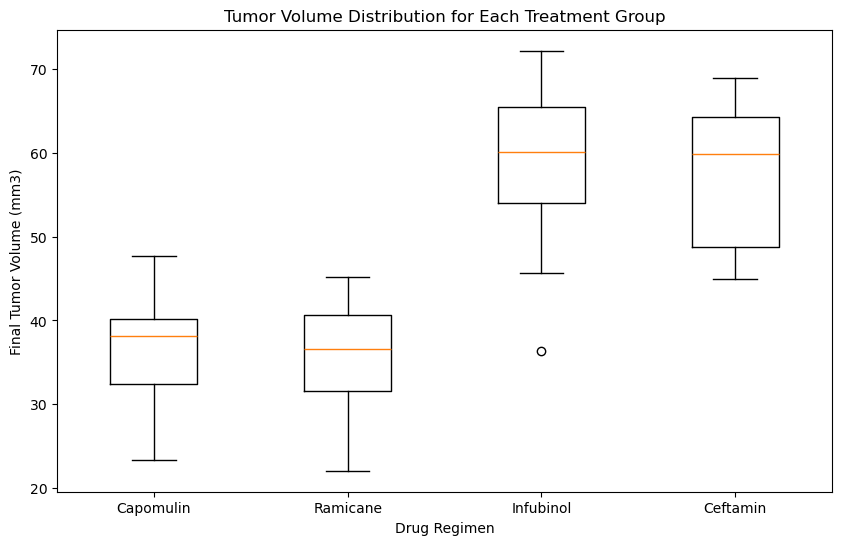

In [58]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))

# Create a list of tumor volumes for each treatment regimen
tumor_volumes = [final_timepoint_data.loc[final_timepoint_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'] for treatment in treatment_regimens]

plt.boxplot(tumor_volumes, labels=treatment_regimens)
plt.title('Tumor Volume Distribution for Each Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

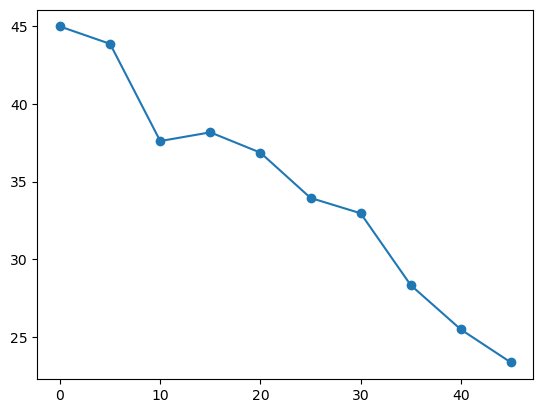

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = data_combined_filtered[data_combined_filtered['Drug Regimen'] == 'Capomulin']  
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 's185']
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

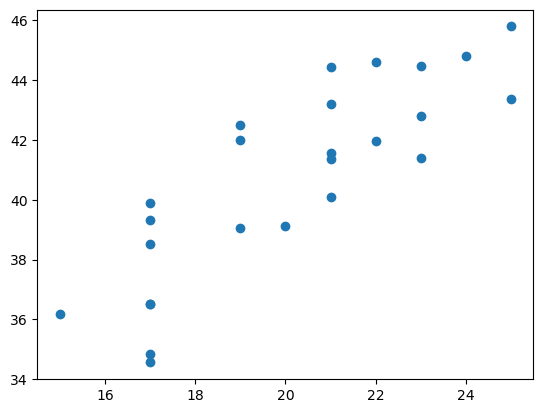

In [61]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = data_combined_filtered[data_combined_filtered['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(average_weight, average_tumor_volume)

## Correlation and Regression

Text(20, 36, 'y = 0.95x + 21.55')

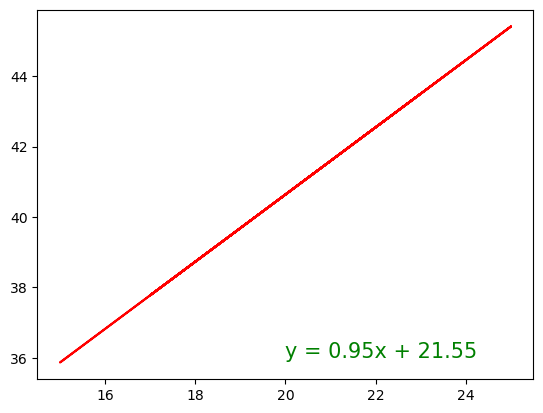

In [65]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(average_weight, average_tumor_volume)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_weight, average_tumor_volume)
regress_values = average_weight * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
plt.plot(average_weight, regress_values, 'r-')
plt.annotate(line_eq, (20, 36), fontsize=15, color='green')